# Sieve analysis

# Document information

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Sieve analysis</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2020-10-07</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-07-11</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">sieve_analysis.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">sieve_data.csv</td>
    </tr>
</table>

# In brevi

The purpose of this Jupyter notebook is to perform a sieve analysis.

# Methodology

A sieve analysis is used to determine the particle size distribution of a granular material. Material is passed through a series of progressively smaller sieves. The mass of the material stopped by each sieve is determined as a fraction of the whole mass.

# Data

Download the data file:

[sieve_data.csv](https://drive.google.com/open?id=1QuhQmVAnxEakP879FnAt-GD0ElpuT49M)

This file has five columns:

- std sieve
- tyler sieve
- particle diameter
- sieve mass
- sieve soil mass

Clear the contents of the "sieve mass" and "sieve soil mass" columns. Enter values of "sieve mass" and "sieve soil mass" for the desired sieves. Save the file as a CSV with UTF-8 encoding.

# How to use this notebook

1. Edit the constant.
2. Recalculate all the "In" cells.

# Import libraries and basic setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

# Define  constants

In [3]:
colour1 = '#0077bb'
colour2 = '#33bbee'
figure_size = (8, 6)
# Enter the density of the material that was sieved.
density = 1.32

# Read the data file

In [4]:
df = pd.read_csv('sieve_data.csv')

# Perform the analysis

In [5]:
df['retained mass'] = df['sieve soil mass'] - df['sieve mass']
# Drop rows where empty cells are present in column 'sieve mass'
df = df.dropna(
    axis=0,
    how='any',
    subset=['sieve mass']
)
retained_mass_total = df['retained mass'].sum()
df['retained pct'] = df['retained mass'] / retained_mass_total * 100
df['cumul retained pct'] = df['retained pct'].cumsum()
df['passing pct'] = 100 - df['cumul retained pct']

# Save the results

In [6]:
df.round(3).to_csv('sieve_results.csv')

# Perform the geometric analysis

In [7]:
geometric_mean_particle_size = np.exp(
    ((df['retained mass'] * np.log(df['particle diameter'])).sum()) /
    retained_mass_total
)
print(
    'geometric mean particle size',
    np.exp(((df['retained mass'] *
           np.log(df['particle diameter'])).sum())
           / retained_mass_total).round(3),
    sep=" = "
)
geometric_standard_deviation = np.exp(
    (((df['retained mass'] * (np.log(df['particle diameter']) -
     (df['retained mass'] * np.log(df['particle diameter'])).sum() /
     retained_mass_total)**2).sum()) / retained_mass_total)**0.5
)
print('geometric standard deviation',
      geometric_standard_deviation.round(3),
      sep=" = ")
surface_area = 6 / density * np.exp(
    0.5 * (np.log(geometric_standard_deviation)**2) -
    np.log(geometric_mean_particle_size / 10000))
print('surface area',
      surface_area.round(3),
      sep=" = ")
number_parts_per_g = 1 / density * \
    np.exp(
        (4.5 * np.log(geometric_standard_deviation)**2) -
        3 * np.log(geometric_mean_particle_size / 10000)
        )
print('number parts per g',
      number_parts_per_g.round(3),
      sep=" = ")

geometric mean particle size = 479.502
geometric standard deviation = 1.881
surface area = 115.72
number parts per g = 41366.213


# Create graphs

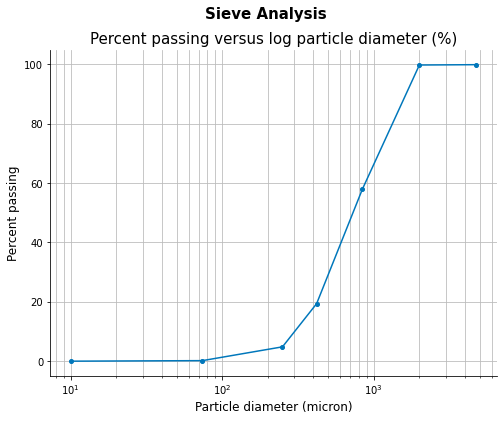

In [8]:
fig = plt.figure(figsize=figure_size)
ax = fig.add_subplot(111)
ax.semilogx(
    df['particle diameter'],
    df['passing pct'],
    marker='.',
    markersize=8,
    linestyle='-',
    color=colour1
)
ax.grid(
    b=True,
    which='both',
    axis='both',
    color='#bbbbbb'
)
fig.suptitle(
    t='Sieve Analysis',
    ha='center',
    fontsize=15,
    fontweight='bold'
)
ax.set_title(
    label='Percent passing versus log particle diameter (%)',
    loc='center',
    fontsize=15,
    fontweight='normal'
)
ax.set_xlabel(
    xlabel='Particle diameter (micron)',
    ha='center',
    fontsize=12,
    fontweight='normal'
)
ax.set_ylabel(
    ylabel='Percent passing',
    ha='center',
    fontsize=12,
    fontweight='normal'
)
for spine in 'right', 'top':
    ax.spines[spine].set_visible(False)
fig.savefig('sieve_percent_passing_vs_logdiameter.svg', format='svg')
fig.savefig('sieve_percent_passing_vs_logdiameter.pdf', format='pdf')

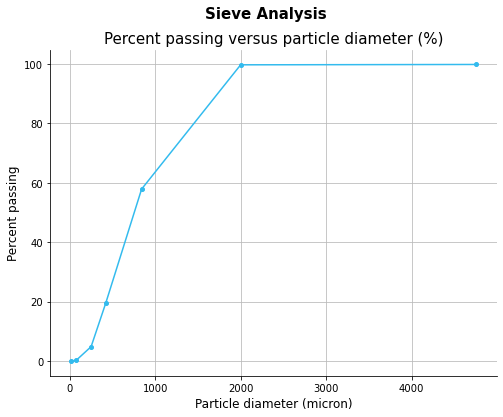

In [9]:
fig = plt.figure(figsize=figure_size)
ax = fig.add_subplot(111)
ax.plot(
    df['particle diameter'],
    df['passing pct'],
    marker='.',
    markersize=8,
    linestyle='-',
    color=colour2
)
ax.grid(
    b=True,
    which='both',
    axis='both',
    color='#bbbbbb'
)
fig.suptitle(
    t='Sieve Analysis',
    ha='center',
    fontsize=15,
    fontweight='bold'
)
ax.set_title(
    label='Percent passing versus particle diameter (%)',
    loc='center',
    fontsize=15,
    fontweight='normal'
)
ax.set_xlabel(
    xlabel='Particle diameter (micron)',
    ha='center',
    fontsize=12,
    fontweight='normal'
)
ax.set_ylabel(
    ylabel='Percent passing',
    ha='center',
    fontsize=12,
    fontweight='normal'
)
for spine in 'right', 'top':
    ax.spines[spine].set_visible(False)
fig.savefig('sieve_percent_passing_vs_diameter.svg', format='svg')
fig.savefig('sieve_percent_passing_vs_diameter.pdf', format='pdf')